In [39]:
#Loading Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_curve,roc_auc_score,auc

#Importing the Model Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#Importing Boosting Models
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier

#Importing Error Metrics
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score,roc_curve,auc




In [40]:
#Loading preprocessing pipline functions
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from scipy.stats import zscore

In [41]:
hra=pd.read_csv('hr_analytics.csv')

In [42]:
hra

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


✏ In this the target varible is Attrition

# Exploratory Data Analysis

In [43]:
hra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Mostly columns are of integer type excepy Attrition, Business Travel, Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime.

In [44]:
hra.shape

(1470, 35)

In [45]:
#Checking of null values in the data

hra.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [46]:
# we see there are no null values in above whole data.

In [47]:
hra['Gender']

0       Female
1         Male
2         Male
3       Female
4         Male
         ...  
1465      Male
1466      Male
1467      Male
1468      Male
1469      Male
Name: Gender, Length: 1470, dtype: object

No     1233
Yes     237
Name: Attrition, dtype: int64


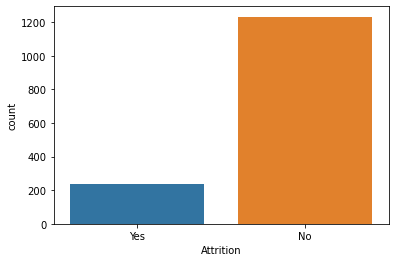

In [48]:
sns.countplot(hra['Attrition'])
print(hra['Attrition'].value_counts())

No     1233
Yes     237
Name: Attrition, dtype: int64


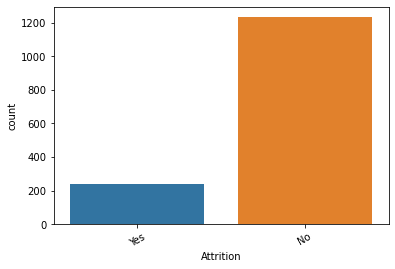

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


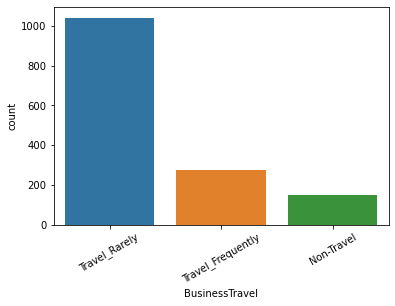

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


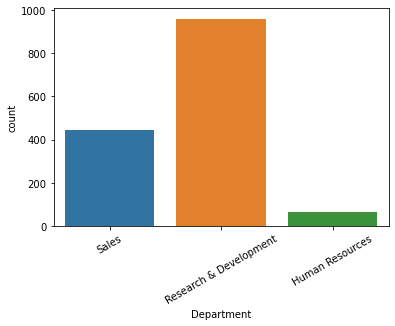

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


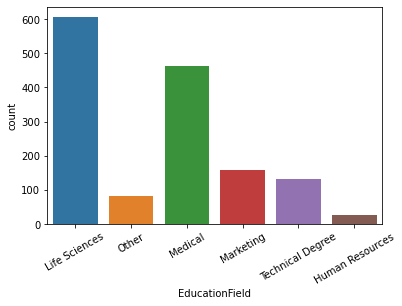

Male      882
Female    588
Name: Gender, dtype: int64


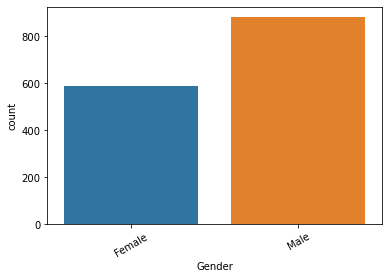

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


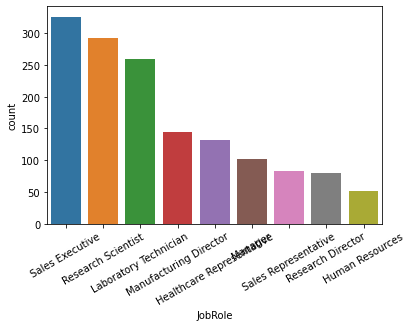

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


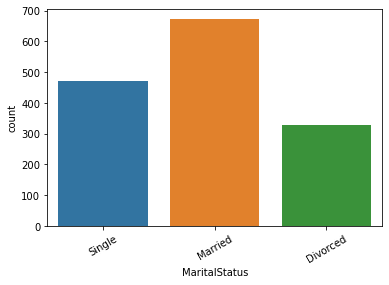

Y    1470
Name: Over18, dtype: int64


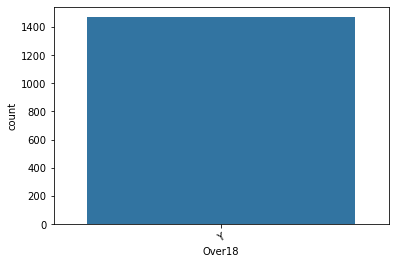

No     1054
Yes     416
Name: OverTime, dtype: int64


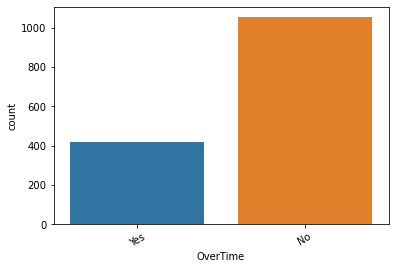

In [49]:
for i in hra.columns:
    if hra.dtypes.loc[i]=='object':
        print(hra[i].value_counts())
        sns.countplot(hra[i])
        plt.xticks(rotation=30)
        plt.show()
        

Observations:

1. In travel there are a huge number of employees who travel rarely for the work. 
2. In department most of the employees in the data are in the research and development department
3. In EducationField there are six education sectors as Life Sciences, Other,Medical,Marketing, Technical Degree,Human Resources. and out of all six maximum persons are from Life Science and minimum are Human Resources.
4. In Gender the company has more male employees than female
5. In JobRole they are button down in nine ways and the most employees are from Sales Executive.
6. In Marital Status we observe three marital status as single, Married and Divorced And Married employee are more in number.
7. Over18 is a feature with constant entry for all employees as all the employees are over 18. this column will not help in the Machine Learning.
8. Overtime is a feature in which we can observe that employees are not much interested in doing overtime.

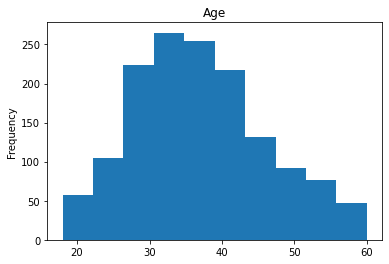

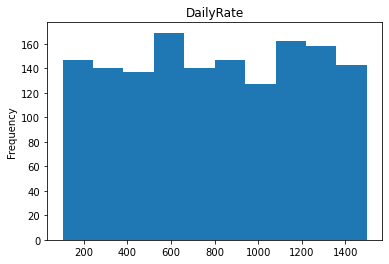

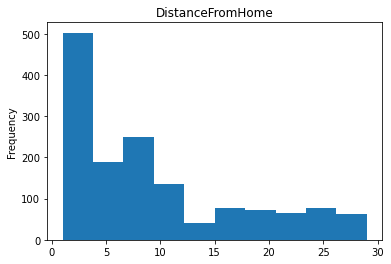

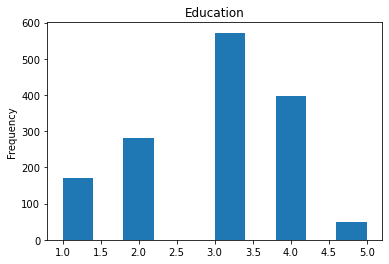

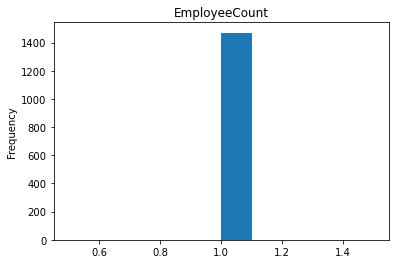

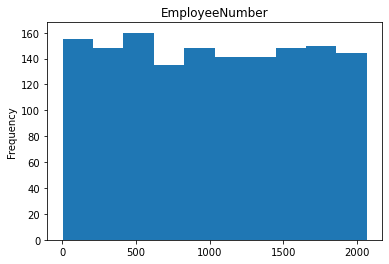

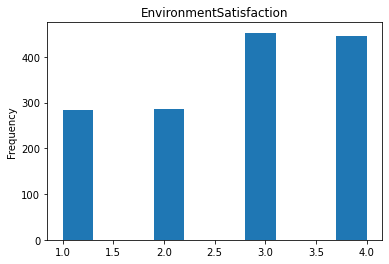

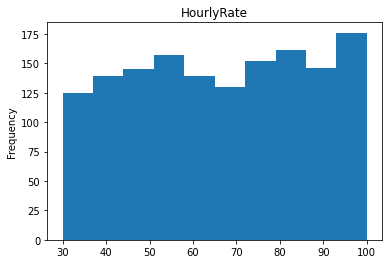

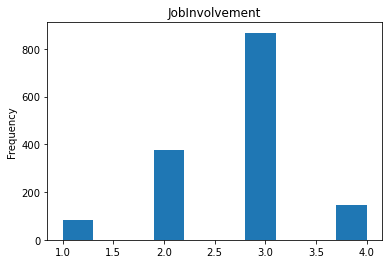

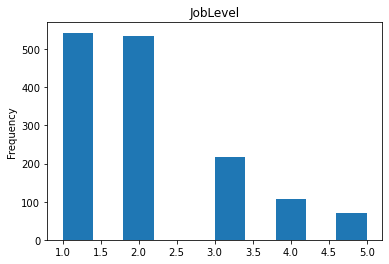

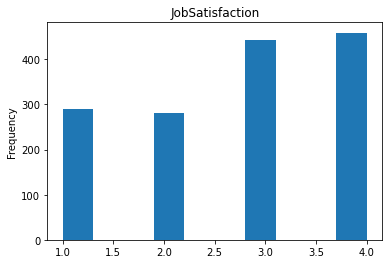

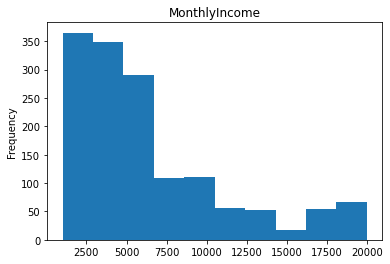

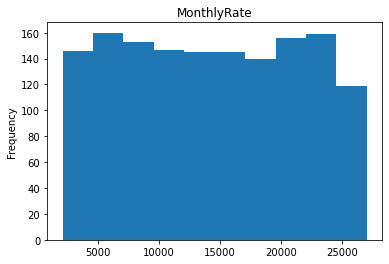

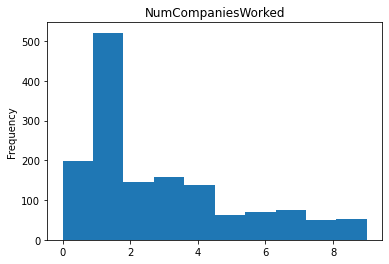

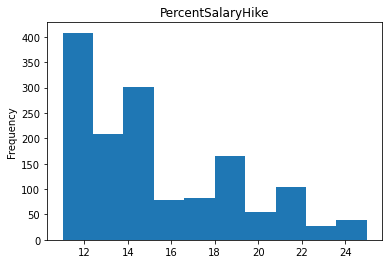

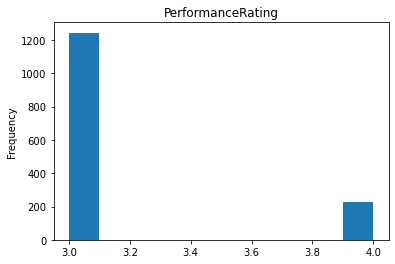

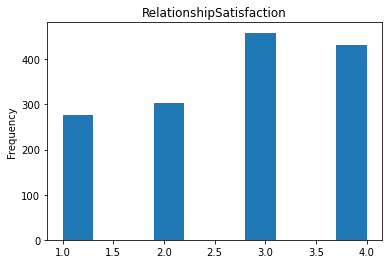

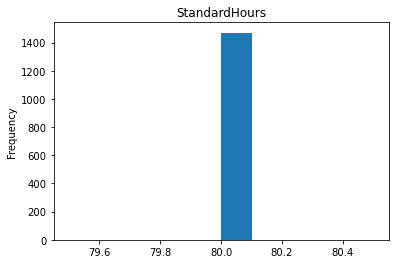

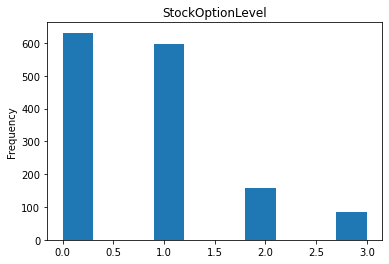

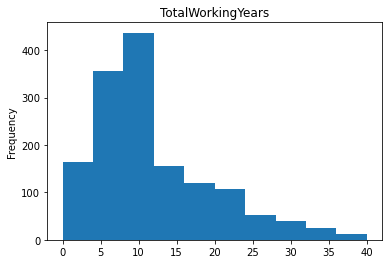

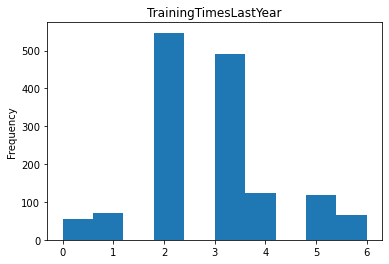

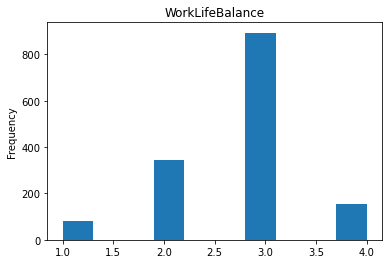

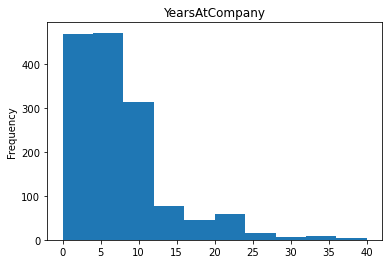

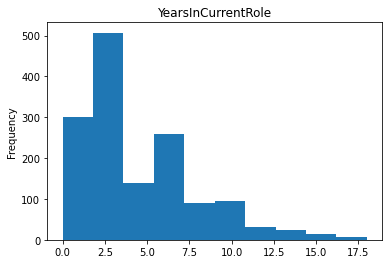

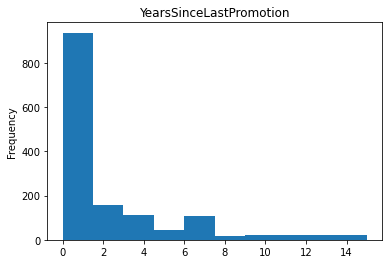

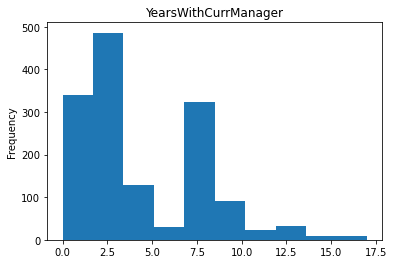

In [50]:
for i in hra. columns:
    if hra.dtypes.loc[i]=='int64':
        hra[i].plot.hist()
        plt.title(i)
        plt.show()

Observations:

1. There are several features i.e. DistanceFromHome,JobSatisfaction,MonthlyRate,TotalWorkingYears,PercenSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole etc, are righly skewed. which we have to deal prior to our model fitting.


2. EmployeeNumber and StandardHours are such features which are almost alike to all employees. So these features has nothing to contribute in the target variable.

================================================================================================================================


Note: Attrition is a categorical data with yes and no as the entries and for comparing it with other variabless we need to convert attrition categorical data into binary data using Label Encoder.
    

In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [52]:
hra['Attrition']=le.fit_transform(hra['Attrition'].astype(str))

In [53]:
hra

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


#Using Attrition as fixed variable comparing with other variables.

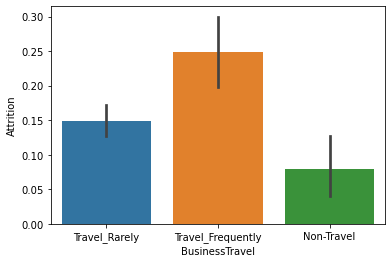

In [54]:
sns.barplot(x='BusinessTravel',y='Attrition',data=hra)

Number of employees who travel frequently with a higher Attrition Rate.

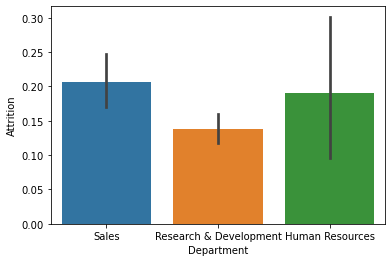

In [55]:
sns.barplot(x='Department',y='Attrition',data=hra)

Sales Department  have a slight higher attrition rate than Human Resources and R&D has the lowest among of all three department.

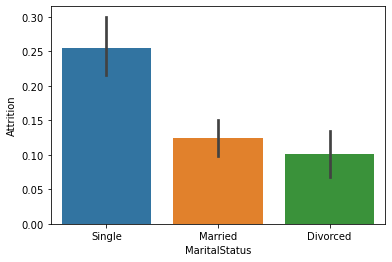

In [56]:
sns.barplot(x='MaritalStatus',y='Attrition',data=hra)

No of employees who are single are the one with the higher attrition rate among married and Divorced

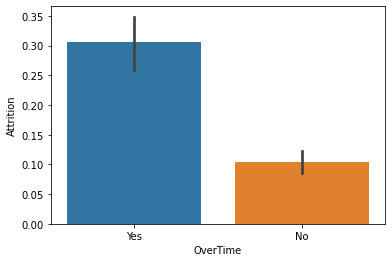

In [57]:
sns.barplot(x='OverTime',y='Attrition',data=hra)

Employees who are working over time can leave the company as they are having higher attrition rate. 

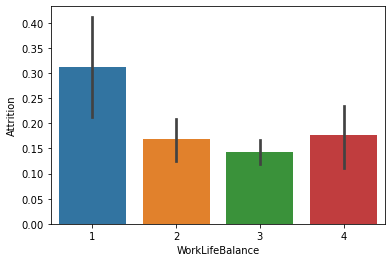

In [58]:
sns.barplot(x='WorkLifeBalance',y='Attrition',data=hra)

Employee who is having low work life balance lean to have higher attrition rate.

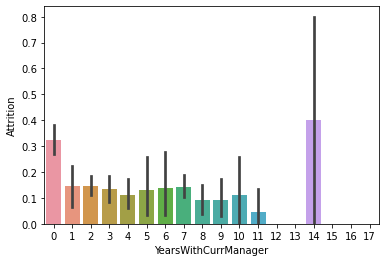

In [59]:
sns.barplot(x='YearsWithCurrManager',y='Attrition',data=hra)

No such change can been seen either a employee is with current manager or not they are having a high attrition rate. 

In [60]:
#Statistics analysis

hra.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


After we are describing no of columns we are not visible in the above table. To get a more clear view  of it  lets now draw distplot and boxplot which will tell us skewness and oultiers of the data we have.

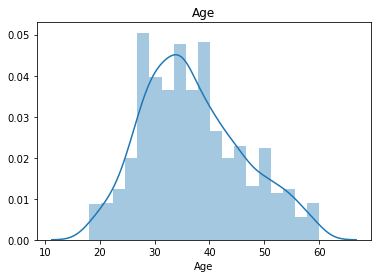

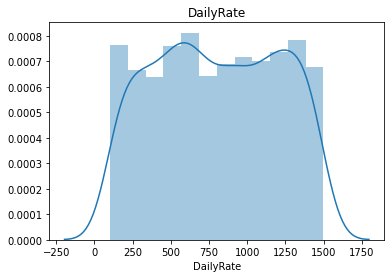

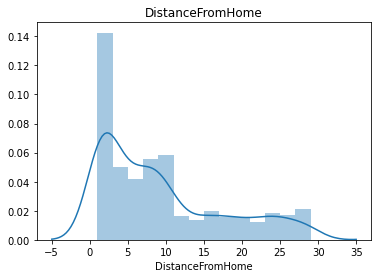

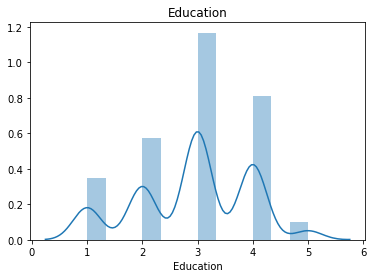

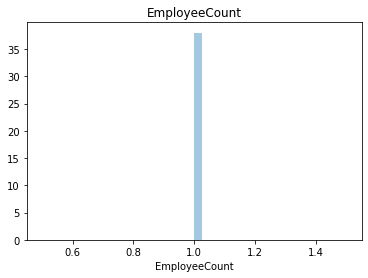

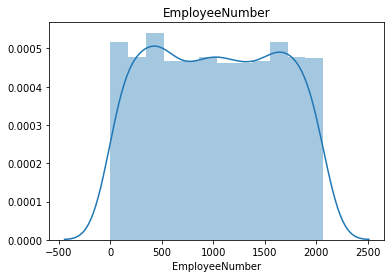

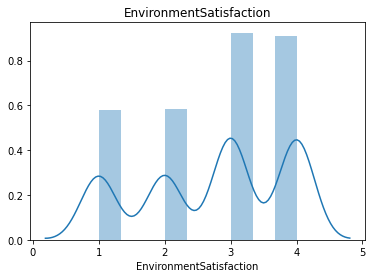

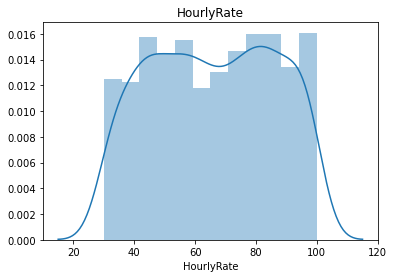

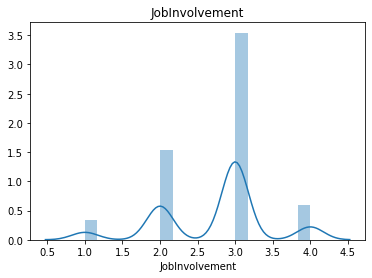

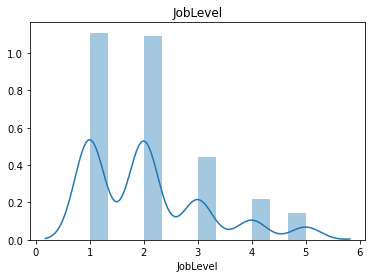

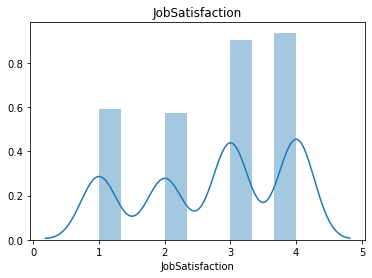

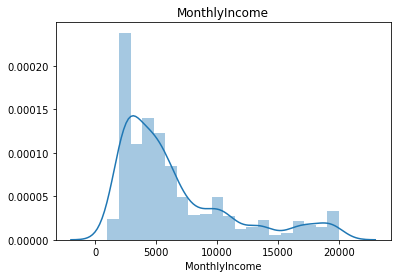

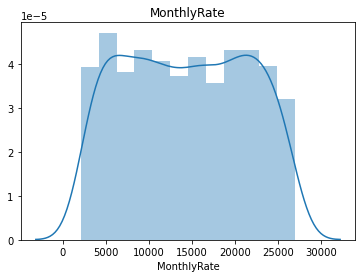

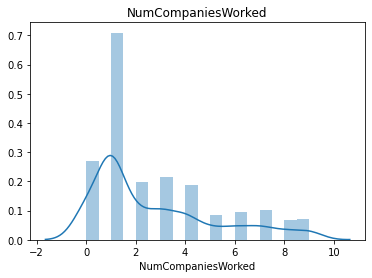

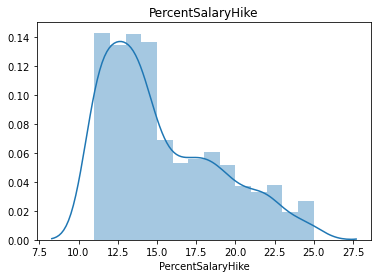

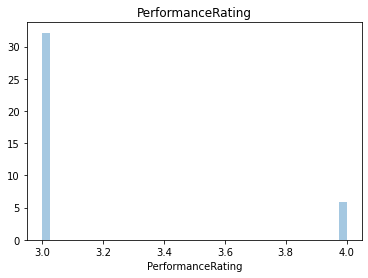

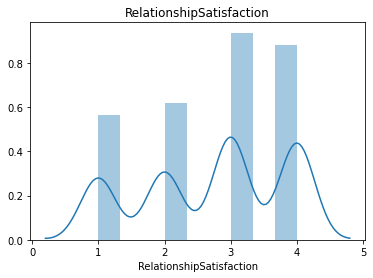

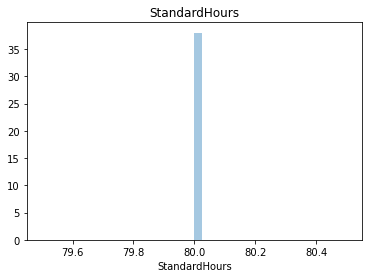

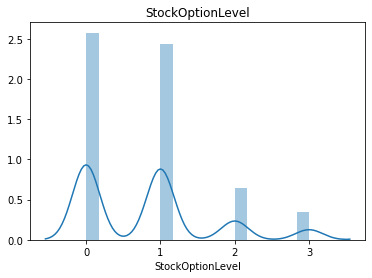

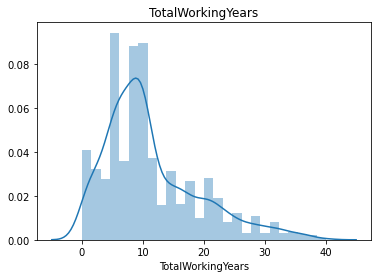

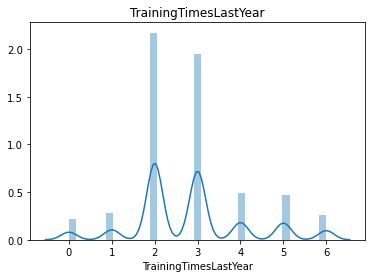

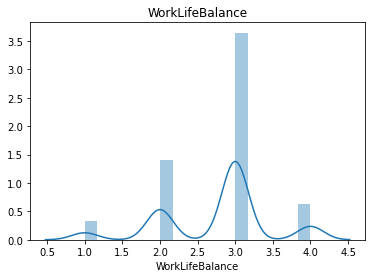

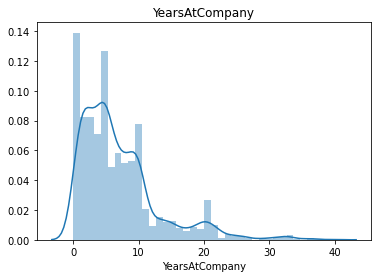

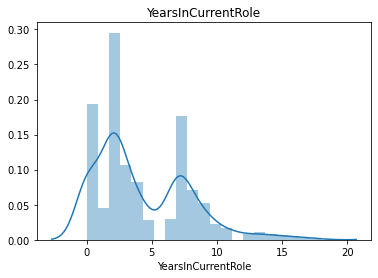

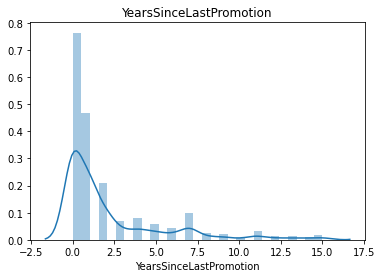

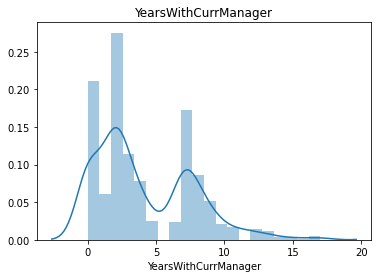

In [61]:
for i in hra.columns:
    if hra.dtypes.loc[i]=='int64':
        sns.distplot(hra[i])
        plt.title(i)
        plt.show()

Skewed columns:DistanceFromHome, MonthlyIncome, NumCompaniesWorked, PercentSalaryHike, TotalWorkingHours, YearsSinceLastPromotion, YearsAtCompany these features are skewed.

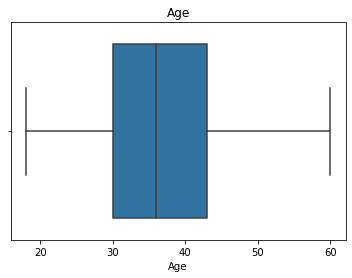

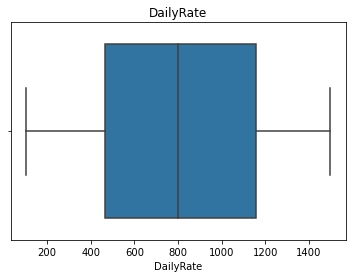

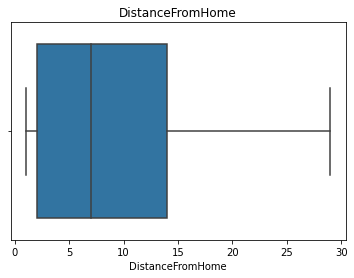

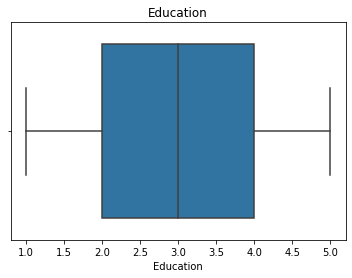

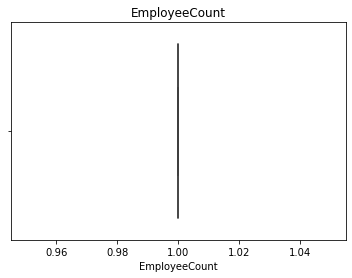

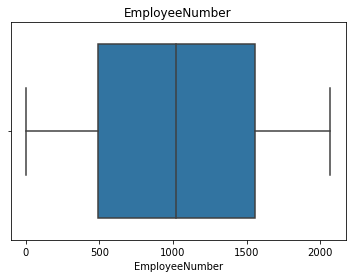

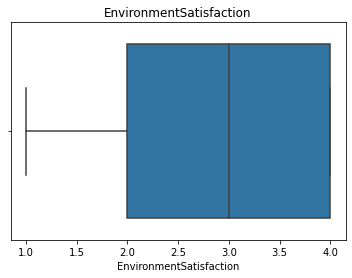

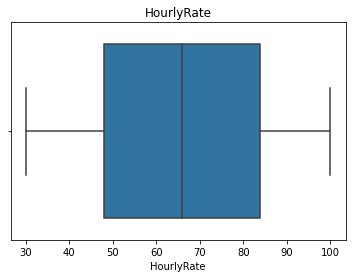

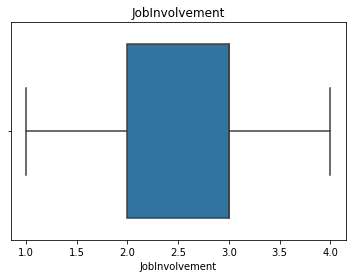

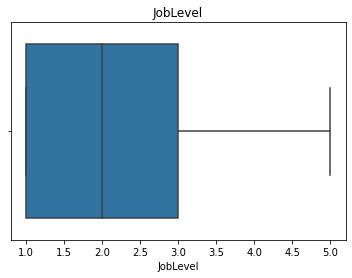

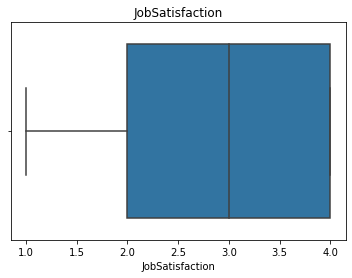

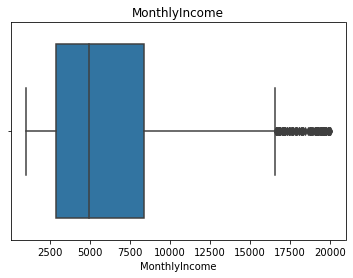

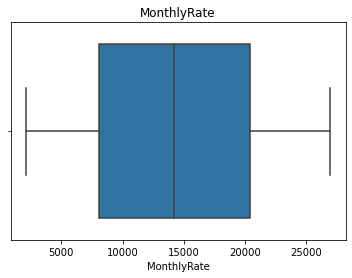

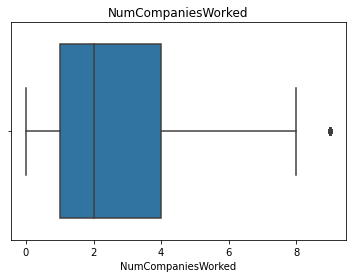

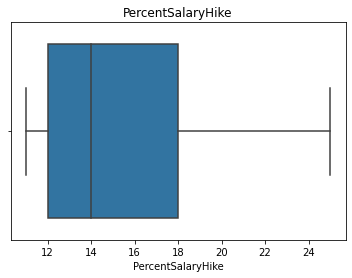

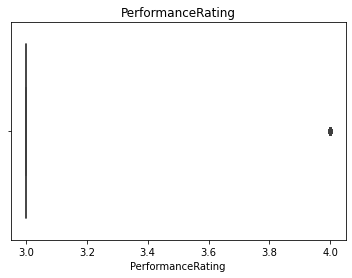

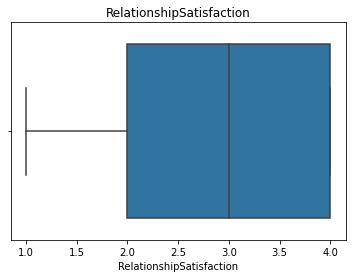

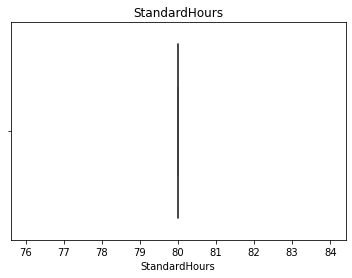

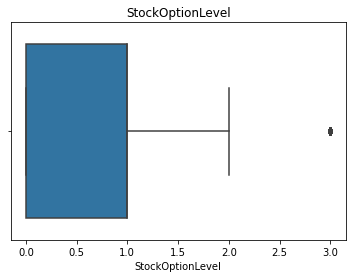

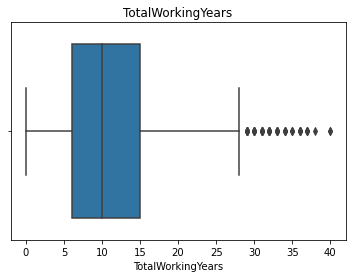

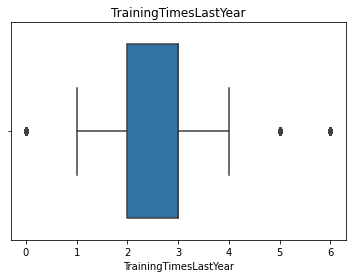

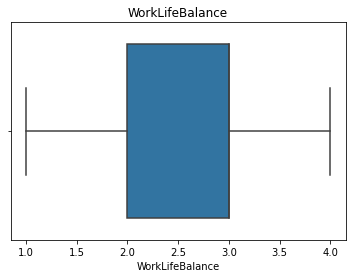

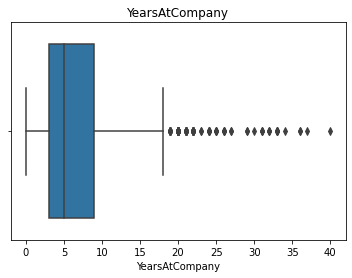

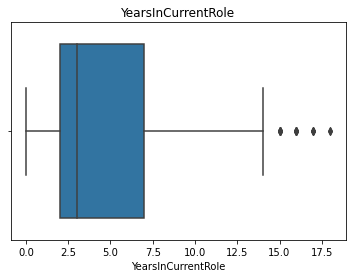

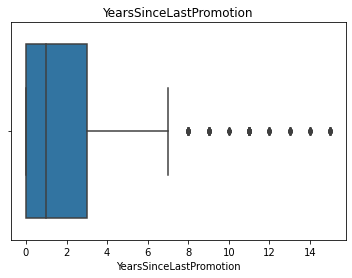

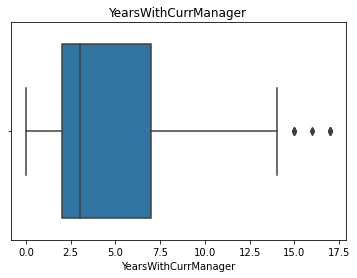

In [62]:
for i in hra.columns:
    if hra.dtypes.loc[i]=='int64':
        sns.boxplot(hra[i].dropna())
        plt.title(i)
        plt.show()

Found Outliers in : MonthlyIncome, PercentSalaryHike, TotalWorkingHours, YearsAtCompany, YearsInCurrrentRole, YearsSinceLastPromotion

In [63]:
# Applying LabelEncoder to convert categorical data

In [64]:
# from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in hra.columns:
    if hra.dtypes.loc[i]=='object':
        hra[i]=le.fit_transform(hra[i].astype(str))

In [65]:
hra

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


Dropping the features with constant entry i.e. Over18, StandardHours, EmployeeCount.

In [66]:
hra.drop(['Over18','StandardHours','EmployeeCount'],axis=1,inplace=True)

In [67]:
hra

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [68]:
hra.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,-0.010145,0.010146,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.010577,-0.103369,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,-0.015578,0.004174,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,-0.050990,0.018355,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.010895,-0.019395,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,0.032916,-0.016075,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,0.042070,-0.027128,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,-0.002516,0.043163,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,1.000000,0.017621,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,0.017621,1.000000,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999


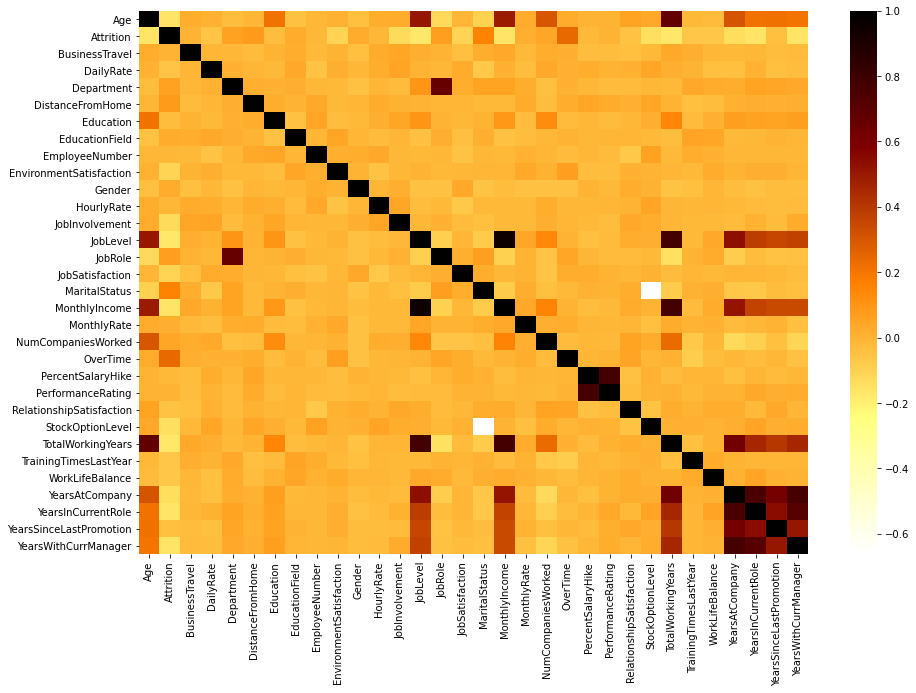

In [69]:
plt.figure(figsize=(15,10))
sns.heatmap(hra.corr(),cmap='afmhot_r')

Observations:

1. Attrition has a negative correlaton with age.
2. percent salary hike,performancerating are positively correlated.
3. YearsInCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager are positively correlated with each other.

In [70]:
# Checking skewness

hra.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
W

In [71]:
#Treating skewness using Powertransform
from sklearn.preprocessing import PowerTransformer
list=['Age', 'BusinessTravel', 'DailyRate', 'Department','DistanceFromHome', 'Education', 'EducationField','EmployeeNumber','EnvironmentSatisfaction', 'Gender', 'HourlyRate','JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction','MaritalStatus', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction', 'StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']
pt=PowerTransformer(method='yeo-johnson')
for i in list:
    if hra.skew().loc[i]>0.55:
        hra[i]=pt.fit_transform(hra[i].values.reshape(-1,1))
    if hra.skew().loc[i]<-0.55:
        hra[i]=pt.fit_transform(hra[i].values.reshape(-1,1))
    else:
        hra[i]=hra[i]

In [72]:
hra.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -0.970506
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome           -0.007468
Education                  -0.289681
EducationField             -0.008386
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.103624
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          0.014814
OverTime                    0.964489
PercentSalaryHike           0.116250
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.087019
TotalWorkingYears          -0.010653
TrainingTimesLastYear       0.058058
W

In [73]:
#Removing outliers
# from scipy.stats import zscore
z=np.abs(zscore(hra))

In [74]:
hras=hra[(z<3).all(axis=1)]

In [75]:
hras

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0.635468,1102,2,-1.494085,2,-0.960488,1,2,...,-0.423557,1,-1.087933,-0.244305,-2.579073,-2.144446,0.139692,0.205562,-1.094862,0.490147
1,49,0,-1.392865,279,1,0.243416,1,-0.960488,2,3,...,2.348814,4,0.548969,0.052495,0.217384,0.276821,0.762660,0.883888,0.096854,0.909635
2,37,1,0.635468,1373,1,-1.031215,2,1.247620,4,4,...,-0.423557,2,-1.087933,-0.410500,0.217384,0.276821,-2.229592,-1.596434,-1.094862,-1.550156
3,33,0,-1.392865,1392,1,-0.700347,4,-0.960488,5,4,...,-0.423557,3,-1.087933,-0.244305,0.217384,0.276821,0.482432,0.883888,0.905592,-1.550156
4,27,0,0.635468,591,1,-1.031215,1,0.697390,7,1,...,-0.423557,4,0.548969,-0.592063,0.217384,0.276821,-0.951540,-0.446645,0.607464,-0.406881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,-1.392865,884,1,1.407126,2,0.697390,2061,3,...,-0.423557,3,0.548969,0.859893,0.217384,0.276821,-0.066114,-0.446645,-1.094862,-0.053000
1466,39,0,0.635468,613,1,-0.050827,1,0.697390,2062,4,...,-0.423557,1,0.548969,-0.090665,1.615639,0.276821,0.320677,0.883888,0.096854,0.909635
1467,27,0,0.635468,155,1,-0.442291,3,-0.960488,2064,2,...,2.348814,2,0.548969,-0.592063,-2.579073,0.276821,0.139692,-0.446645,-1.094862,-0.053000
1468,49,0,-1.392865,1023,2,-1.031215,3,0.697390,2065,4,...,-0.423557,4,-1.087933,0.859893,0.217384,-1.108624,0.628829,0.682995,-1.094862,1.090110


In [76]:
print('Shape before removing outliers:',hra.shape)
print('Shape after removing outliers: ',hras.shape)

Shape before removing outliers: (1470, 32)
Shape after removing outliers:  (1470, 32)


In [77]:
hras.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -0.970506
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome           -0.007468
Education                  -0.289681
EducationField             -0.008386
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.103624
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          0.014814
OverTime                    0.964489
PercentSalaryHike           0.116250
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.087019
TotalWorkingYears          -0.010653
TrainingTimesLastYear       0.058058
W

In [78]:
x=hras.drop(['Attrition'],axis=1)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0.635468,1102,2,-1.494085,2,-0.960488,1,2,0,...,-0.423557,1,-1.087933,-0.244305,-2.579073,-2.144446,0.139692,0.205562,-1.094862,0.490147
1,49,-1.392865,279,1,0.243416,1,-0.960488,2,3,1,...,2.348814,4,0.548969,0.052495,0.217384,0.276821,0.762660,0.883888,0.096854,0.909635
2,37,0.635468,1373,1,-1.031215,2,1.247620,4,4,1,...,-0.423557,2,-1.087933,-0.410500,0.217384,0.276821,-2.229592,-1.596434,-1.094862,-1.550156
3,33,-1.392865,1392,1,-0.700347,4,-0.960488,5,4,0,...,-0.423557,3,-1.087933,-0.244305,0.217384,0.276821,0.482432,0.883888,0.905592,-1.550156
4,27,0.635468,591,1,-1.031215,1,0.697390,7,1,1,...,-0.423557,4,0.548969,-0.592063,0.217384,0.276821,-0.951540,-0.446645,0.607464,-0.406881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,-1.392865,884,1,1.407126,2,0.697390,2061,3,1,...,-0.423557,3,0.548969,0.859893,0.217384,0.276821,-0.066114,-0.446645,-1.094862,-0.053000
1466,39,0.635468,613,1,-0.050827,1,0.697390,2062,4,1,...,-0.423557,1,0.548969,-0.090665,1.615639,0.276821,0.320677,0.883888,0.096854,0.909635
1467,27,0.635468,155,1,-0.442291,3,-0.960488,2064,2,1,...,2.348814,2,0.548969,-0.592063,-2.579073,0.276821,0.139692,-0.446645,-1.094862,-0.053000
1468,49,-1.392865,1023,2,-1.031215,3,0.697390,2065,4,1,...,-0.423557,4,-1.087933,0.859893,0.217384,-1.108624,0.628829,0.682995,-1.094862,1.090110


In [79]:
y=hras['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [80]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [81]:
xx=sc.fit_transform(x)
x=pd.DataFrame(xx,columns=x.columns)

In [82]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.635468,0.742527,1.401512,-1.494085,-0.891688,-0.960488,-1.701283,-0.660531,-1.224745,...,-0.426230,-1.584178,-1.087933,-0.244305,-2.579073,-2.144446,0.139692,0.205562,-1.094862,0.490147
1,1.322365,-1.392865,-1.297775,-0.493817,0.243416,-1.868426,-0.960488,-1.699621,0.254625,0.816497,...,2.346151,1.191438,0.548969,0.052495,0.217384,0.276821,0.762660,0.883888,0.096854,0.909635
2,0.008343,0.635468,1.414363,-0.493817,-1.031215,-0.891688,1.247620,-1.696298,1.169781,0.816497,...,-0.426230,-0.658973,-1.087933,-0.410500,0.217384,0.276821,-2.229592,-1.596434,-1.094862,-1.550156
3,-0.429664,-1.392865,1.461466,-0.493817,-0.700347,1.061787,-0.960488,-1.694636,1.169781,-1.224745,...,-0.426230,0.266233,-1.087933,-0.244305,0.217384,0.276821,0.482432,0.883888,0.905592,-1.550156
4,-1.086676,0.635468,-0.524295,-0.493817,-1.031215,-1.868426,0.697390,-1.691313,-1.575686,0.816497,...,-0.426230,1.191438,0.548969,-0.592063,0.217384,0.276821,-0.951540,-0.446645,0.607464,-0.406881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,-1.392865,0.202082,-0.493817,1.407126,-0.891688,0.697390,1.721670,0.254625,0.816497,...,-0.426230,0.266233,0.548969,0.859893,0.217384,0.276821,-0.066114,-0.446645,-1.094862,-0.053000
1466,0.227347,0.635468,-0.469754,-0.493817,-0.050827,-1.868426,0.697390,1.723332,1.169781,0.816497,...,-0.426230,-1.584178,0.548969,-0.090665,1.615639,0.276821,0.320677,0.883888,0.096854,0.909635
1467,-1.086676,0.635468,-1.605183,-0.493817,-0.442291,0.085049,-0.960488,1.726655,-0.660531,0.816497,...,2.346151,-0.658973,0.548969,-0.592063,-2.579073,0.276821,0.139692,-0.446645,-1.094862,-0.053000
1468,1.322365,-1.392865,0.546677,1.401512,-1.031215,0.085049,0.697390,1.728317,1.169781,0.816497,...,-0.426230,1.191438,-1.087933,0.859893,0.217384,-1.108624,0.628829,0.682995,-1.094862,1.090110


In [83]:
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
#from sklearn.naive_bayes import GaussianNB
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [84]:
list=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier()]
for g in list:
    r_max=0
    print('for the algorithm: ',g)
    for i in range(33,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
        g.fit(x_train,y_train)
        pred=g.predict(x_test)
        accuracy=accuracy_score(pred,y_test)
        print('accuracy score corresponding to random state',i,'is: ',accuracy)
        if accuracy>r_max:
            r_max=accuracy
            final=i
    print('\n')
    print('Max accuracy score corresponding to: ', final,'is: ',r_max)
    print('✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦')
    print('\n')

for the algorithm:  LogisticRegression()
accuracy score corresponding to random state 33 is:  0.8505434782608695
accuracy score corresponding to random state 34 is:  0.8722826086956522
accuracy score corresponding to random state 35 is:  0.8777173913043478
accuracy score corresponding to random state 36 is:  0.8614130434782609
accuracy score corresponding to random state 37 is:  0.8804347826086957
accuracy score corresponding to random state 38 is:  0.8777173913043478
accuracy score corresponding to random state 39 is:  0.8777173913043478
accuracy score corresponding to random state 40 is:  0.8967391304347826
accuracy score corresponding to random state 41 is:  0.875
accuracy score corresponding to random state 42 is:  0.8885869565217391
accuracy score corresponding to random state 43 is:  0.8369565217391305
accuracy score corresponding to random state 44 is:  0.8831521739130435
accuracy score corresponding to random state 45 is:  0.8586956521739131
accuracy score corresponding to rand

In [85]:
list=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier()]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=40)
for j in list:
    print('for the algorithm: ',j)
    j.fit(x_train,y_train)
    scr=j.score(x_train,y_train)
    pred=j.predict(x_test)
    accuracy=accuracy_score(pred,y_test)
    print('The score is: ',scr)
    print('Accuracy score is: ',accuracy)
    print('confusion matrix: \n',confusion_matrix(pred,y_test))
    print('classification report: \n',classification_report(pred,y_test))
    print('✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦')

for the algorithm:  LogisticRegression()
The score is:  0.8720508166969148
Accuracy score is:  0.8967391304347826
confusion matrix: 
 [[303  30]
 [  8  27]]
classification report: 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94       333
           1       0.47      0.77      0.59        35

    accuracy                           0.90       368
   macro avg       0.72      0.84      0.76       368
weighted avg       0.93      0.90      0.91       368

✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦
for the algorithm:  GaussianNB()
The score is:  0.8121597096188747
Accuracy score is:  0.8532608695652174
confusion matrix: 
 [[278  21]
 [ 33  36]]
classification report: 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       299
           1       0.63      0.52      0.57        69

    accuracy                           0.85       368
   macro avg       0.76      0.73      0.74       368

In [86]:
#from sklearn.model_selection import cross_val_score

list=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier()]
for i in list:
    print(i,'\n')
    score=cross_val_score(i,x,y,cv=5,scoring='accuracy')
    print('Score: ',score)
    print('Mean score :',score.mean())
    print('Standard Deviation :',score.std())
    print('✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦\n')

LogisticRegression() 

Score:  [0.87755102 0.86054422 0.8707483  0.8707483  0.88435374]
Mean score : 0.8727891156462585
Standard Deviation : 0.007933267884143275
✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦

GaussianNB() 

Score:  [0.85034014 0.80272109 0.79591837 0.79251701 0.85714286]
Mean score : 0.8197278911564625
Standard Deviation : 0.028048337589235764
✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦

SVC() 

Score:  [0.86734694 0.84353741 0.8707483  0.85714286 0.87414966]
Mean score : 0.8625850340136054
Standard Deviation : 0.011094902333537451
✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦

DecisionTreeClassifier() 

Score:  [0.7755102  0.77210884 0.82312925 0.7585034  0.78571429]
Mean score : 0.7829931972789115
Standard Deviation : 0.021874741756208904
✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦

KNeighborsClassifier() 

Score:  [0.84693878 0.83333333 0.84693878 0.85034014 0.85714286]
Mean score : 0.846938775510204
Standard Deviation : 0.007756295408837643


In [87]:
#Using some ensemble techniques to boost our model.

#from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier

model=(RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier())
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=40)
for i in model:
    print("For model: ",i)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('Score: ',i.score(x_train,y_train))
    print('Accuracy score: ',accuracy_score(pred,y_test))
    print('Confusion matrix: \n',confusion_matrix(pred,y_test))
    print('classification report: \n',classification_report(pred,y_test))
    print('✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦')

For model:  RandomForestClassifier()
Score:  1.0
Accuracy score:  0.8695652173913043
Confusion matrix: 
 [[310  47]
 [  1  10]]
classification report: 
               precision    recall  f1-score   support

           0       1.00      0.87      0.93       357
           1       0.18      0.91      0.29        11

    accuracy                           0.87       368
   macro avg       0.59      0.89      0.61       368
weighted avg       0.97      0.87      0.91       368

✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦
For model:  AdaBoostClassifier()
Score:  0.8974591651542649
Accuracy score:  0.8885869565217391
Confusion matrix: 
 [[302  32]
 [  9  25]]
classification report: 
               precision    recall  f1-score   support

           0       0.97      0.90      0.94       334
           1       0.44      0.74      0.55        34

    accuracy                           0.89       368
   macro avg       0.70      0.82      0.74       368
weighted avg       0.92      0.89     

In [88]:
model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier()]
for i in model:
    print(i,'\n')
    score=cross_val_score(i,x,y,cv=5,scoring='accuracy')
    print('Score: ',score)
    print('Mean score :',score.mean())
    print('Standard Deviation :',score.std())
    print('✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦\n')

RandomForestClassifier() 

Score:  [0.84693878 0.86054422 0.85714286 0.85034014 0.86054422]
Mean score : 0.8551020408163265
Standard Deviation : 0.005526556737847565
✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦

AdaBoostClassifier() 

Score:  [0.83673469 0.86734694 0.85714286 0.88435374 0.84013605]
Mean score : 0.8571428571428571
Standard Deviation : 0.01760840694631941
✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦

GradientBoostingClassifier() 

Score:  [0.84693878 0.87414966 0.87414966 0.85714286 0.86054422]
Mean score : 0.8625850340136054
Standard Deviation : 0.010450538432474276
✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦

BaggingClassifier() 

Score:  [0.84013605 0.85034014 0.85714286 0.83673469 0.8707483 ]
Mean score : 0.8510204081632653
Standard Deviation : 0.012244897959183642
✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦



In [89]:
# Using grid searchCV to find out best parameters for different models.

In [90]:
#For SVC
# from sklearn.model_selection import GridSearchCV
parameters={ 'C' :[1,10],'kernel':['linear','poly','rbf']}
svc=SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 1, 'kernel': 'linear'}


In [91]:
#For KNeighborsClassifier
parameters={ 'n_neighbors' :[1,10],'weights':['uniform','distance']}
knc=KNeighborsClassifier()
clf=GridSearchCV(knc,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_neighbors': 10, 'weights': 'distance'}


In [92]:
#For RandomForestClassifier
parameters={ 'n_estimators' :[100,200,300],'criterion':['gini','entropy']}
rfc=RandomForestClassifier()
clf=GridSearchCV(rfc,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'criterion': 'entropy', 'n_estimators': 300}


In [93]:
#For GradientBoostingClassifier
parameters={ 'n_estimators' :[100,200,300],'criterion':['friedman_mse','mse','mae']}
gbc=GradientBoostingClassifier()
clf=GridSearchCV(gbc,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'criterion': 'friedman_mse', 'n_estimators': 100}


In [94]:
SV=SVC(C=10, kernel='linear')
KN=KNeighborsClassifier(n_neighbors= 10, weights= 'uniform')
RF=RandomForestClassifier(criterion= 'entropy', n_estimators= 300)
GB=GradientBoostingClassifier(criterion='friedman_mse', n_estimators=100)

In [95]:
models=[]
models.append(('SupportVectorClassifier',SV))
models.append(('KNeighborsClassifier',KN))
models.append(('RandomForestClassifier',RF))
models.append(('GradientBoostingClassifier',GB))

SupportVectorClassifier :

SVC(C=10, kernel='linear')


Accuracy Score:  0.8885869565217391


Cross Val Score:  0.8734693877551021


AUC_ROC_Score 0.6833361538895469


[[305   6]
 [ 35  22]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       311
           1       0.79      0.39      0.52        57

    accuracy                           0.89       368
   macro avg       0.84      0.68      0.73       368
weighted avg       0.88      0.89      0.87       368



AxesSubplot(0.125,0.808774;0.775x0.0712264)


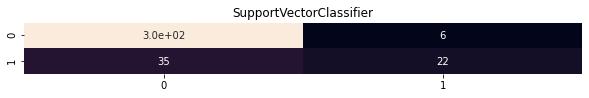

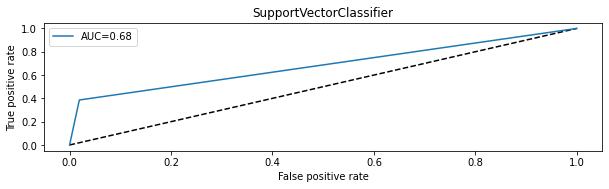



KNeighborsClassifier :

KNeighborsClassifier(n_neighbors=10)


Accuracy Score:  0.8478260869565217


Cross Val Score:  0.8448979591836736


AUC_ROC_Score 0.5087719298245614


[[311   0]
 [ 56   1]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       311
           1       1.00      0.02      0.03        57

    accuracy                           0.85       368
   macro avg       0.92      0.51      0.48       368
weighted avg       0.87      0.85      0.78       368



AxesSubplot(0.125,0.808774;0.775x0.0712264)


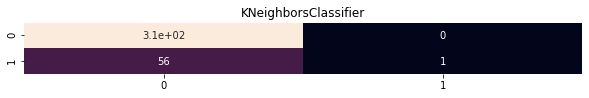

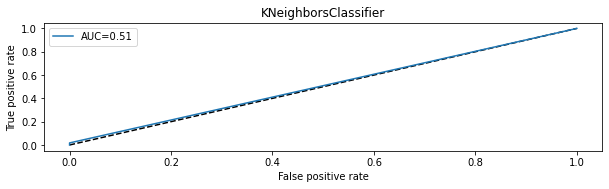



RandomForestClassifier :

RandomForestClassifier(criterion='entropy', n_estimators=300)


Accuracy Score:  0.8722826086956522


Cross Val Score:  0.8571428571428571


AUC_ROC_Score 0.5877192982456141


[[311   0]
 [ 47  10]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       311
           1       1.00      0.18      0.30        57

    accuracy                           0.87       368
   macro avg       0.93      0.59      0.61       368
weighted avg       0.89      0.87      0.83       368



AxesSubplot(0.125,0.808774;0.775x0.0712264)


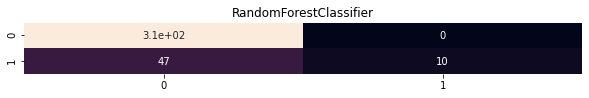

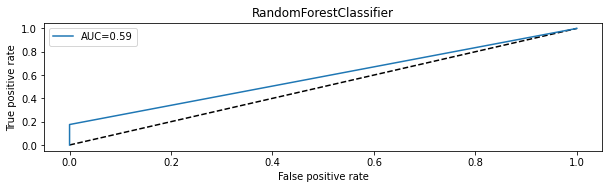



GradientBoostingClassifier :

GradientBoostingClassifier()


Accuracy Score:  0.8695652173913043


Cross Val Score:  0.8619047619047618


AUC_ROC_Score 0.6434252834658996


[[302   9]
 [ 39  18]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       311
           1       0.67      0.32      0.43        57

    accuracy                           0.87       368
   macro avg       0.78      0.64      0.68       368
weighted avg       0.85      0.87      0.85       368



AxesSubplot(0.125,0.808774;0.775x0.0712264)


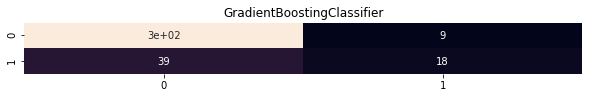

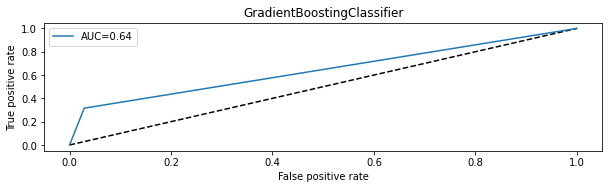

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=40)
Model=[]
Score=[]
CVS=[]
Roc_Score=[]

for name,model in models:
    print(name,':\n')
    Model.append(name)
    
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    
    #Accuracy score
    AS=accuracy_score(y_test,pred)
    print('Accuracy Score: ',AS)
    Score.append(AS*100)
    print('\n')
    
    #cross val score
    cross_val=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('Cross Val Score: ',cross_val)
    CVS.append(cross_val*100)
    print('\n')
    
    #ROC_AUC_Score
    
    false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print("AUC_ROC_Score",roc_auc)
    Roc_Score.append(roc_auc*100)
    print("\n")
    
    #Confusion Matrix
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    
    #Classification Report
    print("Classification Report: \n",classification_report(y_test,pred))
    print('\n')
    
    #Confusion Matrix using Heatmap
    plt.figure(figsize=(10,10))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True,cbar=False))
    plt.show()
    print('\n')
    
    
    #Auc_Roc_curve
    plt.figure(figsize=(10,25))
    plt.subplot(911)
    plt.title(name)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%.2f'%roc_auc)
    plt.legend(loc='Lower Right')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')
    plt.show()
    print('\n')

In [97]:
pd.DataFrame({"Model":Model,"Accuracy Score":Score,'Cross Val Score':CVS,'ROC_AUC_Score':Roc_Score})

,Model,Accuracy Score,Cross Val Score,ROC_AUC_Score
0,SupportVectorClassifier,88.858696,87.346939,68.333615
1,KNeighborsClassifier,84.782609,84.489796,50.877193
2,RandomForestClassifier,87.228261,85.714286,58.771930
3,GradientBoostingClassifier,86.956522,86.190476,64.342528


In [99]:
#Saving Support Vector Classifier as it is enhancing the performance, also it overcomes over fitting.
import joblib
joblib.dump(SVC,'HR_Attrition.pkl')

['HR_Attrition.pkl']